In [619]:
# %matplotlib notebook
# %matplotlib inline
import numpy as np
np.random.seed(123)
import collections, copy, pickle
import scipy.linalg
import pandas as pd
import sklearn
# import scipy.sparse
# import scipy.sparse.linalg
import matplotlib
# import matplotlib.transforms
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
# import mpl_toolkits.mplot3d.axes3d as p3
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# from matplotlib import animation
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
# rcParams['text.usetex'] = True
from IPython.display import HTML
# from numba import jit, njit, float32, prange
# import cProfile

In [436]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [246]:
# https://github.com/pbloem/machine-learning/blob/master/worksheets/Worksheet%202%2C%20Sklearn.ipynb

In [3]:
data = pd.read_csv('ODI-2019-clean.csv', sep=';')

In [4]:
data.describe()

,Unnamed: 0,Day,Month,Year,Neighbours,Money
count,276.000000,201.000000,201.000000,176.000000,276.000000,276.000000
mean,137.500000,15.233831,6.651741,1992.323864,39.286232,inf
std,79.818544,8.970510,3.519675,13.174117,250.892272,NaN
min,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000
25%,68.750000,8.000000,4.000000,1993.000000,2.000000,1.000000
50%,137.500000,15.000000,7.000000,1995.000000,3.000000,10.000000
75%,206.250000,23.000000,10.000000,1996.000000,6.000000,80.000000
max,275.000000,31.000000,12.000000,2030.000000,3921.000000,inf


In [5]:
data.head()

,Unnamed: 0,Timestamp,ML,IR,Stat,DB,Gender,Chocolate,Stand up,Rand,Bedtime,Good day (1),Good day (2),Stress level,Program,Day,Month,Year,Neighbours,Money
0,0,3/27/2019 10:16:11,yes,1,mu,ja,unknown,slim,no,6,23:00,sun,lecture,NaN,AI,NaN,NaN,NaN,3.0,100.0
1,1,4/1/2019 15:58:21,no,0,mu,ja,male,fat,no,7,3,DM,AI,1,AI,9.0,7.0,1992.0,1.0,0.0
2,2,4/1/2019 15:59:07,yes,1,unknown,ja,male,neither,unknown,0,0,0,0,100,CS,4.0,8.0,1995.0,0.0,0.0
3,3,4/1/2019 15:59:30,yes,1,mu,ja,male,fat,no,"1,645","0,3",Winning,Food,0,ECONOMETRICS,29.0,9.0,1993.0,2.0,42.0
4,4,4/1/2019 15:59:58,no,1,mu,ja,male,neither,no,66,20,kiss,love,100,CS,NaN,NaN,NaN,2.0,10.0


## Categorical models

In [16]:
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

# from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Discretization

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html#sphx-glr-auto-examples-preprocessing-plot-discretization-strategies-py

Strategies:
-    ‘uniform’: The discretization is uniform in each feature, which means that the bin widths are constant in each dimension.
-    quantile’: The discretization is done on the quantiled values, which means that each bin has approximately the same number of samples.
       - this causes outliers to be grouped together
-    ‘kmeans’: The discretization is based on the centroids of a KMeans clustering procedure.

In [89]:
X = data['Year']
mean = np.nanmean([x for x in X])
X = np.where(np.isnan(X), mean, X)
X = X.reshape(-1,1)
bins = np.repeat(5, X.shape[1]) # e.g. [5,3] for 2 features
# quantile seem the best strategies
est = preprocessing.KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='kmeans')
est.fit(X)
data['Year bin'] = est.transform(X)

class Encoders: pass
E = Encoders()
E.discretizers = {'Year': est}
E.encoders = {}

In [90]:
# def plot_discretizer(X, enc):
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
    
#     xx, yy = np.meshgrid(
#         np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
#         np.linspace(X[:, 1].min(), X[:, 1].max(), 300))
#     grid = np.c_[xx.ravel(), yy.ravel()]

#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())

#     # transform the dataset with KBinsDiscretizer
#     enc.fit(X)
#     grid_encoded = enc.transform(grid)

#     ax = plt.subplot(len(X_list), len(strategies) + 1, i)

#      # horizontal stripes
#     horizontal = grid_encoded[:, 0].reshape(xx.shape)
#     ax.contourf(xx, yy, horizontal, alpha=.5)
#     # vertical stripes
#     vertical = grid_encoded[:, 1].reshape(xx.shape)
#     ax.contourf(xx, yy, vertical, alpha=.5)

#     ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     if ds_cnt == 0:
#         ax.set_title("strategy='%s'" % (strategy, ), size=14)

In [91]:
# plot_discretizer(X, est)

In [476]:
def init_encoder(columns):
    E.encoders['x'] = preprocessing.OneHotEncoder()
    enc = E.encoders['x']
    enc.fit(columns)
    return enc.transform(columns)

X_enc = init_encoder(data[['Stat', 'Year bin', 'Program']])
E.encoders['x'].categories_

[array(['mu', 'sigma', 'unknown'], dtype=object),
 array([0.0, 1.0, 2.0, 3.0, 4.0], dtype=object),
 array(['AI', 'BA', 'BIOINFORMATICS', 'BIOSB', 'BOINFORMATICS', 'CLS',
        'CLSJD', 'CS', 'CS (EXCHANGE)',
        'DBI DIGITAL BUSINESS AND INNOVATION', 'DHPQRM',
        'DIGITAL BUSINESS & INNOVATION', 'DS', 'DUISENBERG QRM',
        'ECONOMETRICS', 'EOR', 'EXCHANGE STUDENT (SOCIOLOGY)', 'FINANCE',
        'FINANCIAL ECONOMETRIVS', 'HEALTH SCIENCES',
        'INFORMATION SCIENCES ', 'INFORMATION STUDIES: DATA SCIENCE (UVA)',
        'M AI', 'MA DATA SCIENCE (UVA)', 'MA LANGUAGE TECHNOLOGY',
        'MASTER AI', 'MASTER DIGITAL BUSINESS AND INNOVATION',
        'MASTER HEALTH SCIENCES',
        'MASTER MANAGEMENT, POLICY ANALYSIS AND ENTREPENEURSHIP IN HEALTH AND LIFE SCIENCES',
        'MASTER OF FINANCE', 'MASTERS COMPUATIONAL SCIENCE', 'MASTERS EOR',
        'MATHS, STOCHASTICS, MASTER, UVA', 'MBA', 'MEDICAL INFORMATICS',
        'MS', 'MSC QRM (DHP)', 'MSCS', 'MULTIPLE PROGRAMME

In [477]:
def init_label_encoder(column):
    E.encoders['y'] = preprocessing.LabelEncoder()
    enc = E.encoders['y']
    enc.fit(column)
    return enc.transform(column)

Y_enc = init_label_encoder(data['Gender'])
E.encoders['y'].classes_

array(['female', 'male', 'unknown'], dtype=object)

In [478]:
X_enc.shape, Y_enc.shape

((276, 58), (276,))

In [479]:
x_train, x_test, y_train, y_test = train_test_split(X_enc, Y_enc, test_size=0.5)
x_train.shape, y_train.shape

((138, 58), (138,))

In [480]:
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

In [481]:
# eval on train data
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
accuracy_score(y_train, y_pred)

0.6521739130434783

In [482]:
clf = SVC(kernel='poly', gamma='auto', degree=4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

In [483]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_predicted = tree.predict(x_test)
accuracy_score(y_test, y_predicted)

0.5434782608695652

In [484]:
# The cross_val_score function does all the training for us. We simply pass 
# it the complete data, the model, and the metric.

linear = SVC(kernel='linear', probability=True)

# Train for 5 folds, returing ROC AUC. You can also try 'accuracy' as a scorer
n_folds = 5
scores = cross_val_score(linear, X_enc, Y_enc, cv=n_folds, scoring='accuracy') # roc_auc accuracy

print('scores per fold ', scores)
print('  mean score    ', np.mean(scores))
print('  standard dev. ', np.std(scores))

scores per fold  [0.64912281 0.66071429 0.65454545 0.66666667 0.64814815]
  mean score     0.6558394724184199
  standard dev.  0.007027609627066194


In [485]:
# TODO random forest
# simple NN

In [620]:
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
        
        https://scipy-cookbook.readthedocs.io/items/Matplotlib_ColormapTransformations.html
    """
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki, key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in range(N+1)]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [645]:
def e(i,k):
    # unit vector i of length k
    return np.eye(k)[i]

def fix_labels(labels):
    # update in-place
    for i, v in enumerate(labels.copy()):
        if v is None:
            labels[i] = 'None'
        else:
            labels[i] = fix_label(labels[i])

# def plot_classifier_helper(data, xlabels, ylabel, clf):
def plot_classifier(data, xlabels, ylabel, clf):
    X_enc = init_encoder(data[xlabels])
    Y_enc = init_label_encoder(data[ylabel])

#     Y_enc += np.random.randint(0,3, Y_enc.size)
    clf.fit(X_enc, Y_enc)

    categories = E.encoders['x'].categories_
    dims = tuple([c.size for c in categories]) # n features
    n_dims = sum(dims)
    # n combinations = x * y                   ### x^2 * y^2
    X = np.empty((np.prod([x**2 for x in dims]), 1))
    
    # X = np.empty((np.prod(dims), n_dims))
    X = np.empty((dims[0], dims[1], n_dims))
    for i,j in np.ndindex(X.shape[:2]):
        X[i,j] = np.concatenate([e(i,dims[0]), e(j, dims[1])])

    X_enc = X.reshape((dims[0] * dims[1], n_dims))
    Y_enc = clf.predict(X_enc)
    Y_enc[0] = 0
    Y_enc[1] = 1
    Y_enc[2] = 2
    # Y = E.encoders['y'].inverse_transform(Y_enc)
    Y = Y_enc.reshape(dims)

    # def plot_classifier()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # color bar labels correspond to Y (unlike x or y)
    cb_labels = E.encoders['y'].classes_
    cb_ticks = E.encoders['y'].transform(cb_labels)
    n = cb_labels.size
    c = cmap_discretize('rainbow', n) # terrain bone plasma rainbow pink cubehelix jet
    plt.imshow(Y.T, origin='lower', cmap=c)
    
    x_labels = categories[0]
    y_labels = categories[1]
    fix_labels(x_labels)
    fix_labels(y_labels)
    n_x = len(x_labels)
    n_y = len(y_labels)    
    rotation = 0
    length = sum([len(label) for label in x_labels])
    if length > 10:
        rotation = 45
    else:
        rotation = 0        
#         plt.subplots_adjust(bottom=0.15)
    plt.xticks(np.arange(n_x), x_labels, rotation=rotation)
    rotation = 0
    length = sum([len(label) for label in y_labels])
    if length > 10:
        rotation = 45
    else:
        rotation = 0
    plt.yticks(np.arange(n_y), y_labels, rotation=rotation)
#     plt.subplots_adjust(right=0.9)


    # clear grid
    ax.grid(False)        
    # disable spines
    for edge, spine in ax.spines.items():
            spine.set_visible(False)
    # add custom grid
    # add white grid to distinguish cells
    ax.set_xticks(np.arange(Y.shape[0]+1) - 0.5, minor=True)
    ax.set_yticks(np.arange(Y.shape[1]+1) - 0.5, minor=True)
    ax.grid(which="minor", color='w', linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    cb = plt.colorbar()
    cb.set_ticks(cb_ticks)
    cb.set_ticklabels(cb_labels)
#     cb.ax.set_yticklabels(cb_labels)

#     ticks = np.arange(5)
#     labels = E.encoders['y'].inverse_transform(np.linspace(y_min, y_max, 5))

Text(0.5, 0.98, 'Effect of Stat, Year on prediction of Gender')

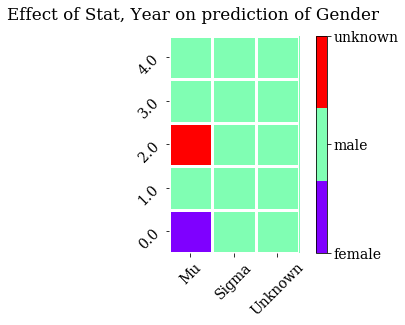

In [647]:
np.random.seed(42)
# clf = SVC(gamma='auto')
clf = DecisionTreeClassifier()
plot_classifier(data, ['Stat', 'Year bin'], 'Gender', clf)
plt.suptitle('Effect of Stat, Year on prediction of Gender')

In [563]:
# The number of divisions of the cmap we have
k = 10

# Random test data
A = np.random.random((10,10))*k
c = cmap_discretize('jet', k)

# First show without
plt.subplot(121)
plt.imshow(A,interpolation='nearest',cmap=c)
plt.colorbar()

# Now label properly
plt.subplot(122)
plt.imshow(A,interpolation='nearest',cmap=c)

cb = plt.colorbar()
labels = np.arange(0,k,1)
loc    = labels + .5
cb.set_ticks(loc)
cb.set_ticklabels(labels)

array([1])

In [144]:
X = np.ndindex(())

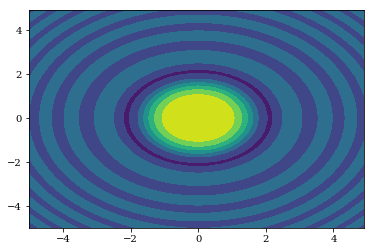

In [178]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

((100,), (100,), (100, 100))

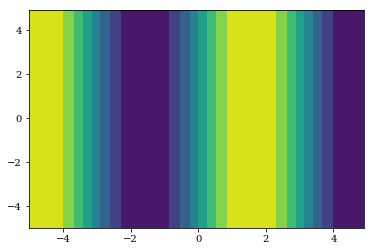

In [224]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx + 0*yy)
h = plt.contourf(x,y,z)
x.shape, y.shape, z.shape

In [226]:
# xx

In [142]:
# from mlxtend.plotting import plot_decision_regions
# import matplotlib.pyplot as plt
# from sklearn import datasets
# from sklearn.svm import SVC

# # Loading some example data
# iris = datasets.load_iris()
# X = iris.data[:, [0, 2]]
# y = iris.target

# # Training a classifier
# svm = SVC(C=0.5, kernel='linear')
# svm.fit(x_train, y_train)


# # Plotting decision regions
# # plot_decision_regions(x_train.toarray(), y_train, clf=svm, legend=2)

# enc = E.encoders['x']
# enc.

# # Decision region for feature 3 = 1.5
# value = 0
# # Plot training sample with feature 3 = 1.5 +/- 0.75
# width = 0
# plot_decision_regions(X, y, clf=svm,
#                       filler_feature_values={2: value},
#                       filler_feature_ranges={2: width},
#                       legend=2, ax=ax)


# # Adding axes annotations
# plt.xlabel('sepal length [cm]')
# plt.ylabel('petal length [cm]')
# plt.title('SVM on Iris')
# plt.show()


In [101]:
# from mlxtend.plotting import plot_decision_regions

# n = 10
# plot_decision_regions(x_test[:n], y_test.astype(np.integer)[:n], 
#                       clf=clf, res=0.1);

In [237]:
# from sklearn.metrics import roc_curve, auc

# # The linear classifier doesn't produce class probabilities by default. We'll retrain it for probabilities.
# linear = SVC(kernel='linear', probability=True)
# linear.fit(x_train, y_train)

# # We'll need class probabilities from each of the classifiers
# y_linear = linear.predict_proba(x_test)
# y_tree  = tree.predict_proba(x_test)
# y_knn   = knn.predict_proba(x_test)

# # Compute the points on the curve
# # We pass the probability of the second class (KIA) as the y_score
# curve_linear = sklearn.metrics.roc_curve(y_test, y_linear[:, 1])
# curve_tree   = sklearn.metrics.roc_curve(y_test, y_tree[:, 1])
# curve_knn    = sklearn.metrics.roc_curve(y_test, y_knn[:, 1])

# # Compute Area Under the Curve
# auc_linear = auc(curve_linear[0], curve_linear[1])
# auc_tree   = auc(curve_tree[0], curve_tree[1])
# auc_knn    = auc(curve_knn[0], curve_knn[1])

# plt.plot(curve_linear[0], curve_linear[1], label='linear (area = %0.2f)' % auc_linear)
# plt.plot(curve_tree[0], curve_tree[1], label='tree (area = %0.2f)' % auc_tree)
# plt.plot(curve_knn[0], curve_knn[1], label='knn (area = %0.2f)'% auc_knn)

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC curve');

# plt.legend();